In [1]:
#import necesary packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import spacy

In [2]:
#Imports various packages that are necessary
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import networkx
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hanimalik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/hanimalik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hanimalik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hanimalik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/hanimalik/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
#Imports various packages that are necessary
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import warnings
from textblob import TextBlob
from wordcloud import WordCloud

In [4]:
#download english model
spacy.cli.download('en_core_web_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 6.7 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.3.1
    Uninstalling en-core-web-sm-2.3.1:
      Successfully uninstalled en-core-web-sm-2.3.1
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: /Users/hanimalik/opt/anaconda3/bin/python -m pip install --upgrade pip


In [5]:
#load question 3 from survey into pandas (What do you find most useful about the Community Tool Box?)
q3_df = pd.read_csv('data/question3.csv')
pd.set_option('display.max_colwidth', None)
q3_df

,Number,Response_Date,Response_Text
0,1,"Apr 17, 2017 4:10 PM",The examples are very useful for providing a framework to start different projects.
1,2,"Apr 17, 2017 4:08 PM",Detailed information
2,3,"Apr 17, 2017 1:21 PM",I am only starting to use it. Why am i being surveyed now?
3,4,"Apr 17, 2017 1:10 PM",breifly read it but have bookmarked it to use for further resources
4,5,"Apr 17, 2017 2:40 AM","In depth information, checklists, links to useful resources and websites, examplers"
...,...,...,...
260,261,"Mar 28, 2017 4:42 PM",I love the easy to use power point slides that I can use when training or giving one on one techincal assistance.
261,262,"Mar 28, 2017 4:39 PM",The case examples.
262,263,"Mar 28, 2017 4:38 PM",Vast array of services.
263,264,"Mar 28, 2017 4:31 PM",examples and short stories


In [6]:
#shape of dataset
q3_df.shape

(265, 3)

SyntaxError: invalid syntax (581980377.py, line 1)

In [8]:

q3_df['Response_Text'].value_counts()

Everything!                                                                     3
Everything                                                                      2
East access. Detailed content with background, tools, checklist, resources.     1
Education                                                                       1
answer questions I have                                                         1
                                                                               ..
Ease of Use and Being concise                                                   1
Clear instructions, materials already prepared that I can use in teaching       1
Just found Chapter 6 by doing a google search.                                  1
The breadth of resources                                                        1
Structure an free avalable                                                      1
Name: Response_Text, Length: 262, dtype: int64

In [9]:
#https://robertorocha.info/using-nlp-to-analyze-open-ended-responses-in-surveys/
#Was following this guide to understand how this is done
import spacy

nlp = spacy.load('en_core_web_sm')
nlp.max_length = 1850000

In [10]:
all_text = q3_df.Response_Text.str.cat(sep = ' ')

In [11]:
doc = nlp(all_text, disable = ['ner'])

In [12]:
#most common words that are not stop words
from collections import Counter
words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct] 
word_freq = Counter(words) 
word_freq.most_common(50)

[('information', 57),
 (' ', 50),
 ('example', 34),
 ('easy', 26),
 ('community', 21),
 ('tool', 19),
 ('useful', 18),
 ('resource', 17),
 ('clear', 16),
 ('step', 16),
 ('use', 15),
 ('good', 14),
 ('find', 14),
 ('provide', 13),
 ('topic', 13),
 ('like', 11),
 ('understand', 11),
 ('detailed', 10),
 ('organize', 10),
 ('great', 10),
 ('read', 8),
 ('time', 8),
 ('need', 8),
 ('start', 7),
 ('explanation', 7),
 ('Tool', 7),
 ('access', 7),
 ('instruction', 7),
 ('idea', 6),
 ('comprehensive', 6),
 ('detail', 6),
 ('Box', 6),
 ('relevant', 6),
 ('wealth', 6),
 ('available', 6),
 ('work', 6),
 ('practical', 6),
 ('chapter', 6),
 ('give', 6),
 ('different', 5),
 ('survey', 5),
 ('help', 5),
 ('action', 5),
 ('section', 5),
 ('helpful', 5),
 ('search', 5),
 ('point', 5),
 ('content', 5),
 ('language', 5),
 ('learn', 5)]

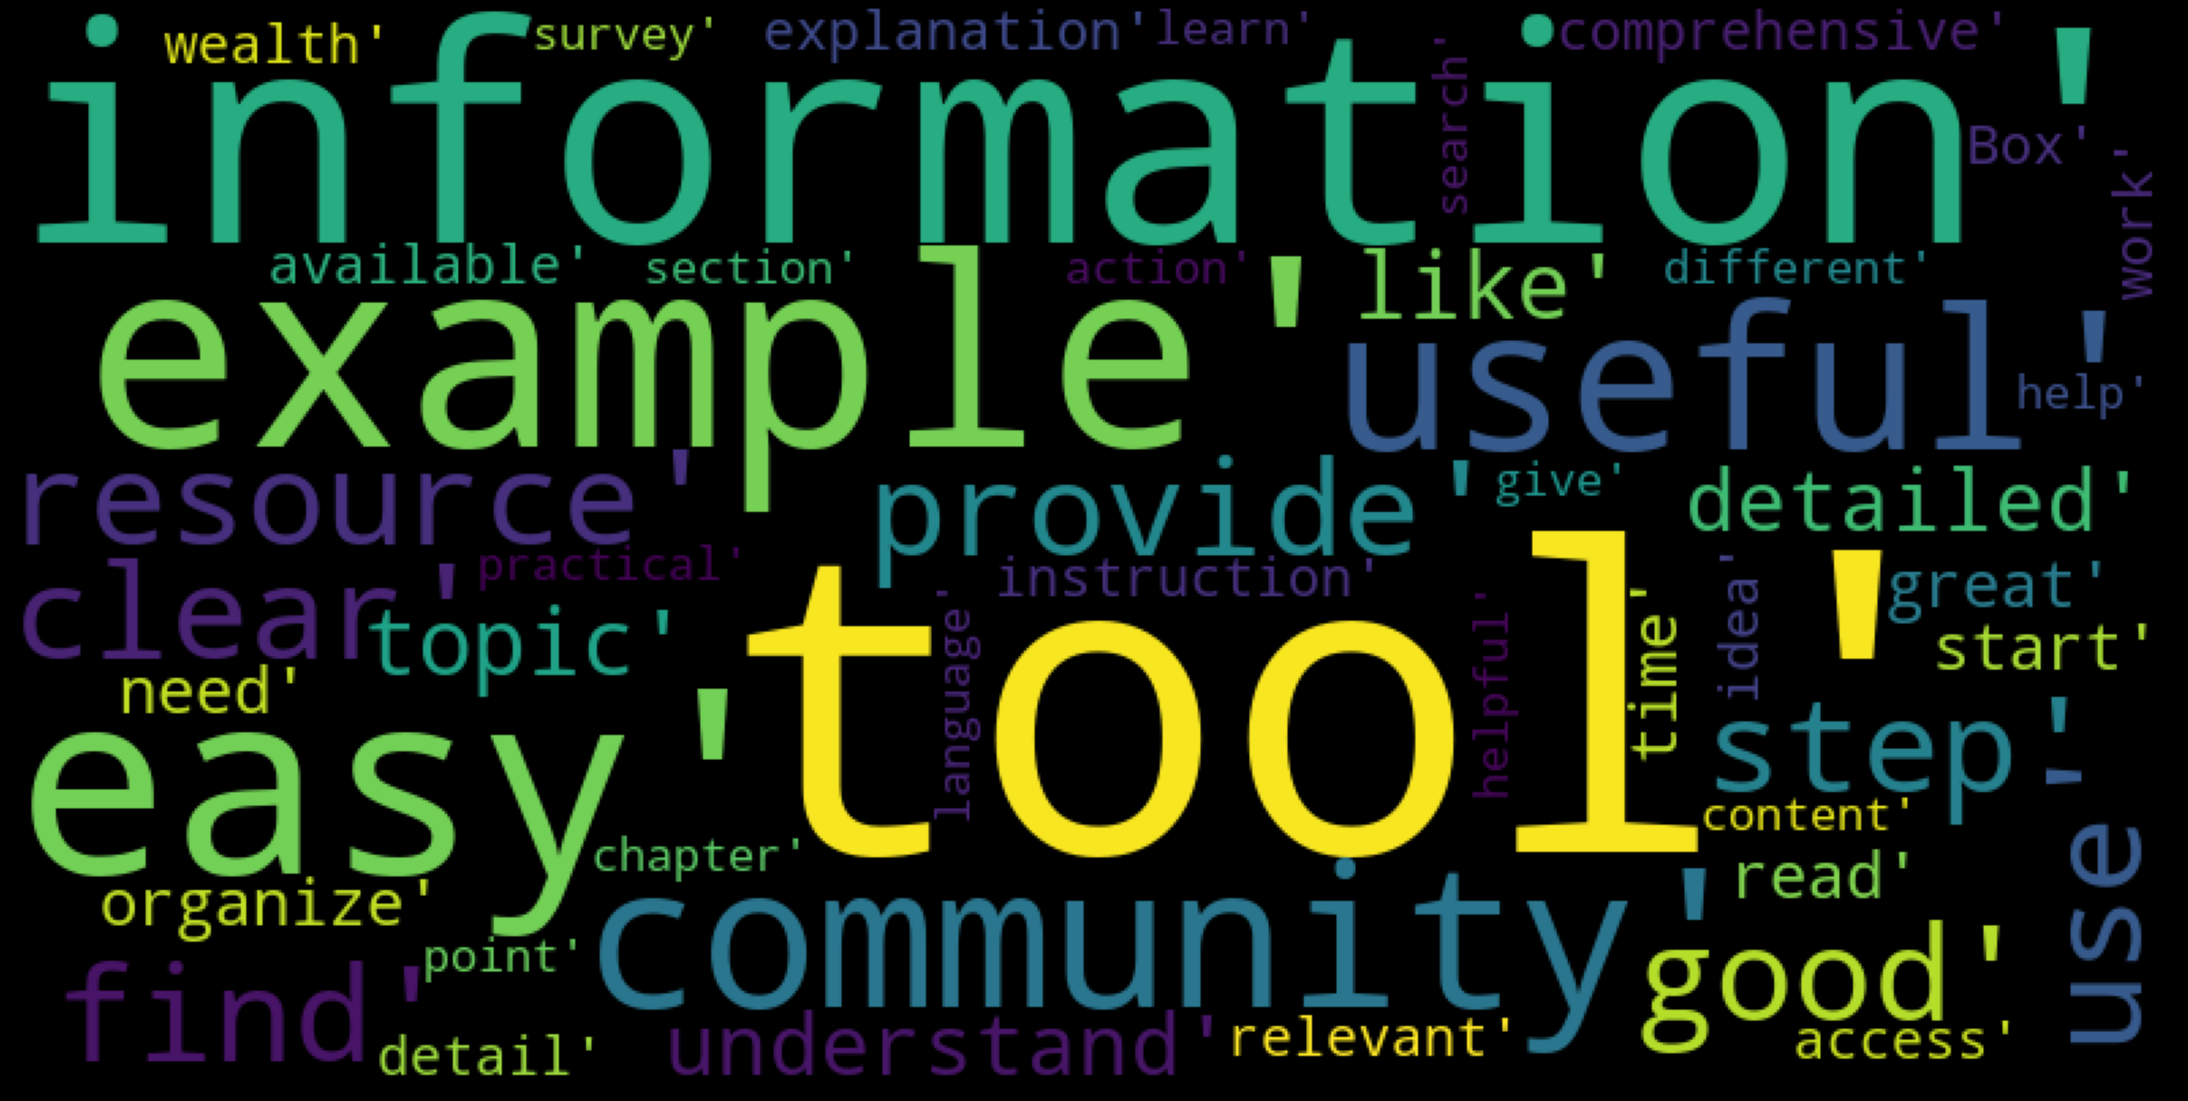

In [13]:
#Word cloud of most common words
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate(str(word_freq.most_common(50)))
                  
plt.figure( figsize=(40,20), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
from spacy.matcher import PhraseMatcher
community_colloc = []
matcher = PhraseMatcher(nlp.vocab, attr = 'LOWER') 
# The attr above ensures all instances are converted to lower-case so the search is case-insensitive
pattern = [nlp.make_doc('community')]
matcher.add('community', pattern) 
matches = matcher(doc)
for match_id, start, end in matches:
    span = doc[start-10 : end+10]   
    community_colloc.extend([token.lemma_.lower() for token in span if not token.is_stop and not token.is_punct]) 
Counter(community_colloc).most_common(20)

[('community', 27),
 ('tool', 12),
 (' ', 9),
 ('information', 8),
 ('box', 7),
 ('useful', 6),
 ('work', 6),
 ('find', 5),
 ('good', 4),
 ('problem', 4),
 ('easy', 3),
 ('toolbox', 3),
 ('guidance', 3),
 ('provide', 3),
 ('practice', 3),
 ('site', 2),
 ('step', 2),
 ('use', 2),
 ('understand', 2),
 ('concise', 2)]

In [15]:

python_bool = q3_df["Response_Text"].str.contains('and')
python_bool.value_counts(normalize=True)

False    0.656604
True     0.343396
Name: Response_Text, dtype: float64

In [16]:
def data_processing(text):
    text = text.lower()
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)


In [17]:
q3_df['text'] = q3_df['Response_Text'].apply(data_processing)

In [18]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [19]:
q3_df['text'] = q3_df['Response_Text'].apply(lambda x: ps.stem(x))    

In [20]:
#Defines polarity function which will use natural language processing polarity measures for all tweets
def polarity(text):
    return TextBlob(text).sentiment.polarity 

In [21]:
#Applies polarity function onto dataframe
q3_df['polarity'] = q3_df['text'].apply(polarity)

In [22]:
q3_df

,Number,Response_Date,Response_Text,text,polarity
0,1,"Apr 17, 2017 4:10 PM",The examples are very useful for providing a framework to start different projects.,the examples are very useful for providing a framework to start different projects.,0.195000
1,2,"Apr 17, 2017 4:08 PM",Detailed information,detailed inform,0.400000
2,3,"Apr 17, 2017 1:21 PM",I am only starting to use it. Why am i being surveyed now?,i am only starting to use it. why am i being surveyed now?,0.000000
3,4,"Apr 17, 2017 1:10 PM",breifly read it but have bookmarked it to use for further resources,breifly read it but have bookmarked it to use for further resourc,0.000000
4,5,"Apr 17, 2017 2:40 AM","In depth information, checklists, links to useful resources and websites, examplers","in depth information, checklists, links to useful resources and websites, examplers",0.300000
...,...,...,...,...,...
260,261,"Mar 28, 2017 4:42 PM",I love the easy to use power point slides that I can use when training or giving one on one techincal assistance.,i love the easy to use power point slides that i can use when training or giving one on one techincal assistance.,0.466667
261,262,"Mar 28, 2017 4:39 PM",The case examples.,the case examples.,0.000000
262,263,"Mar 28, 2017 4:38 PM",Vast array of services.,vast array of services.,0.000000
263,264,"Mar 28, 2017 4:31 PM",examples and short stories,examples and short stori,0.000000


In [23]:
#Defines labels so that each corresponding polarity now has the appropiate sentiment label for it
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label >0:
        return "Positive"

In [24]:
#Applies sentiment label function onto the dataframe so that when the dataframe prints it will include those labels
q3_df['sentiment'] = q3_df['polarity'].apply(sentiment)

In [25]:
q3_df

,Number,Response_Date,Response_Text,text,polarity,sentiment
0,1,"Apr 17, 2017 4:10 PM",The examples are very useful for providing a framework to start different projects.,the examples are very useful for providing a framework to start different projects.,0.195000,Positive
1,2,"Apr 17, 2017 4:08 PM",Detailed information,detailed inform,0.400000,Positive
2,3,"Apr 17, 2017 1:21 PM",I am only starting to use it. Why am i being surveyed now?,i am only starting to use it. why am i being surveyed now?,0.000000,Neutral
3,4,"Apr 17, 2017 1:10 PM",breifly read it but have bookmarked it to use for further resources,breifly read it but have bookmarked it to use for further resourc,0.000000,Neutral
4,5,"Apr 17, 2017 2:40 AM","In depth information, checklists, links to useful resources and websites, examplers","in depth information, checklists, links to useful resources and websites, examplers",0.300000,Positive
...,...,...,...,...,...,...
260,261,"Mar 28, 2017 4:42 PM",I love the easy to use power point slides that I can use when training or giving one on one techincal assistance.,i love the easy to use power point slides that i can use when training or giving one on one techincal assistance.,0.466667,Positive
261,262,"Mar 28, 2017 4:39 PM",The case examples.,the case examples.,0.000000,Neutral
262,263,"Mar 28, 2017 4:38 PM",Vast array of services.,vast array of services.,0.000000,Neutral
263,264,"Mar 28, 2017 4:31 PM",examples and short stories,examples and short stori,0.000000,Neutral


Text(0.5, 1.0, 'Distribution of Sentiments')

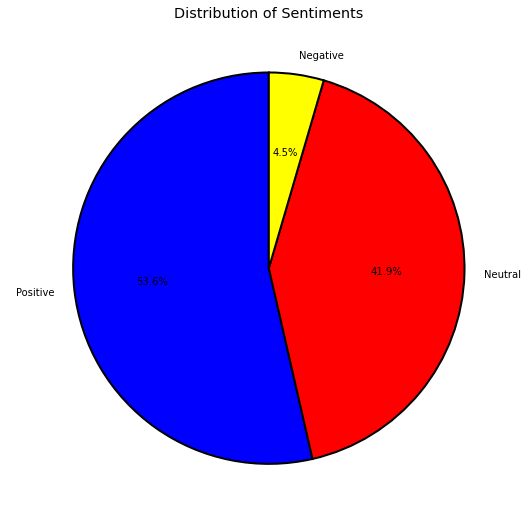

In [26]:
#Plots pie chart figure to visually show how many tweets percentage-wise in the dataframe are Negative, Neutral, or Positive
fig = plt.figure(figsize=(9,9))
colors = ("blue", "red", "yellow")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = q3_df['sentiment'].value_counts()
tags.plot(kind='pie', autopct='%1.1f%%', shadow=False, colors = colors,
          startangle=90, wedgeprops = wp, label = ' ')
plt.title('Distribution of Sentiments')

In [27]:
q3_df.describe()

,Number,polarity
count,265.000000,265.000000
mean,133.000000,0.168477
std,76.643112,0.230659
min,1.000000,-0.400000
25%,67.000000,0.000000
50%,133.000000,0.100000
75%,199.000000,0.300000
max,265.000000,1.000000


In [28]:
occur = q3_df.groupby(['Response_Text','sentiment']).size()
occur

Response_Text                                                                                                     sentiment
 not sure yet                                                                                                     Negative     1
A wealth of helpful instructional information that educates and guides one through needs assessment process       Neutral      1
A wealth of information on program planning and specific tools to assist new group formation                      Positive     1
Accessibility                                                                                                     Neutral      1
Accessibility to resources that assist in the formulation of population-based interventions.                      Neutral      1
                                                                                                                              ..
the whole of it                                                                                       